In [8]:
import numpy as np

times_mks = np.array([2, 2, 2.1, 2.1, 2.7, 2.8, 2.8, 2.8, 2.8, 3, 3.4, 3.5, 3.6, 3.6, 4, 4, 4, 4.1, 4.3, 4.4, 4.6, 4.7, 5, 5.3, 5.3, 5.5, 5.7, 5.9, 6.3, 6.5, 6.7, 6.7, 7, 7.3, 7.4, 7.8, 7.9, 8.2, 8.3, 8.3, 8.5, 9, 10.2, 10.3, 10.4, 10.7, 11.2, 11.2, 11.6, 11.6, 11.7, 12.1, 12.5, 13.1, 13.2, 13.3, 13.6, 13.7, 13.8, 13.8, 16, 16.8, 19.7, 20.3, 21.5, 21.5, 21.6, 22.2, 23.2, 25.5, 26.7, 27.6, 30.6, 31.8, 31.8, 32.1, 34.6, 44.9, 44.9, 47.6, 59, 76.3, 80.8, 95.2]) #  1323.4, 11220.7, 55098.1, 113904.2
lam_approx = 0.1
isotope_name = "243Am"


sigma:  0.9270237984634788
w_bin:  0.7387370515568433


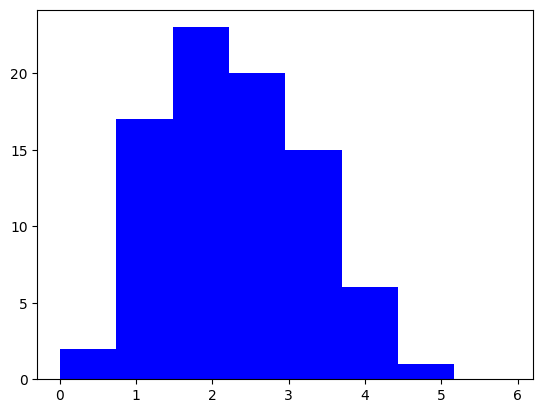

[ 2. 17. 23. 20. 15.  6.  1.  0.]
[0.         0.73873705 1.4774741  2.21621115 2.95494821 3.69368526
 4.43242231 5.17115936 5.90989641]
[1.41421356 4.12310563 4.79583152 4.47213595 3.87298335 2.44948974
 1.         0.         0.        ]

SF count:  84.0


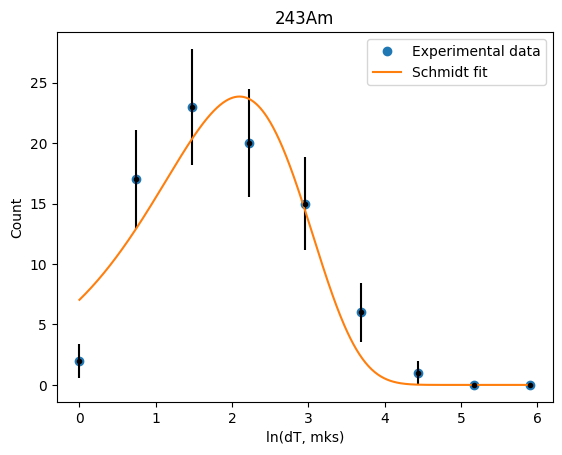

Lambda:  0.12275092293788907
n0:  64.84857653826778
bin_size:  0.7387370515568433
n0 / bin_size:  87.78302970130353
Cov:  [[2.40581197e-04 1.55606510e-03]
 [1.55606510e-03 3.32012933e+01]]
Max:  2.0975979934935
T1/2, mks:  8.146578258364636
Err(T1/2)+, mks:  1.1782794027197152
Err(T1/2)-, mks:  -0.9139122250965572


In [9]:
import io
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

# Schmidt fit
# Eur.Phys.J.A (2000) 8: 141-145 https://link.springer.com/content/pdf/10.1007/s100500070129.pdf
# Z.Phys.A 316 (1984): 19-26 https://link.springer.com/content/pdf/10.1007/BF01415656.pdf

times_ln = np.log(times_mks)

# Otimal bin size calculation 
# Biometrika, 66, #3 (1979): 605–610 https://doi.org/10.1093/biomet/66.3.605
sigma = np.std(times_ln)
size = times_mks.size
print("\nsigma: ", sigma)
w_bin = (3.49 * sigma) / pow(size, 1/3.0) # 0.733
print("w_bin: ", w_bin)

# sigma test
# Eur.Phys.J.A (2000) 8: 141-145 https://link.springer.com/content/pdf/10.1007/s100500070129.pdf
# print("sigma: ", sigma)
# s2Lower = 1.28 - 2.15/pow(size, 0.5)
# print("Lower bound: ", s2Lower)
# s2Upper = 1.28 + 2.15/pow(size, 0.5)
# print("Upper bound: ", s2Upper)
# if sigma >= s2Lower and sigma <= s2Upper:
#     print("sigma test passed!")
# else:
#     print("sigma test failed!")

# for x in range(1000, 20000):
#     print((x/1000.0))

bin_size = w_bin #float(x)/1000.0
counts, bins, bars = plt.hist(times_ln.astype('float'), bins=np.arange(0, 6.0, step=bin_size), color='blue')
plt.show()
print(counts)
print(bins)

x = bins
y = np.append(counts, 0)
dy = np.array(list(map(lambda c : np.sqrt(c), y)))
print(dy)

sf = np.sum(y)
print("\nSF count: ", sf)
n0_approx = sf * bin_size

def func(x, lam, n0):
    return n0*np.exp(x + np.log(lam))*np.exp(-np.exp(x + np.log(lam)))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def fit_param_errors(pcov_matrix):
    return np.sqrt(np.diag(pcov_matrix))

popt, pcov = optimize.curve_fit(func, x, y, [lam_approx, n0_approx])

x_cont = np.arange(x.min(), x.max(), 0.01)

plt.plot(x, y, "o", label='Experimental data')
plt.errorbar(x, y, yerr=dy, fmt='.k')
plt.plot(x_cont, func(x_cont, *popt), label='Schmidt fit')
# plt.plot(x_cont, func(x_cont, lam_approx, n0_approx), label='Schmidt distr. for known T1/2')
plt.legend()
plt.title(isotope_name)
plt.xlabel('ln(dT, mks)')
plt.ylabel('Count')
plt.show()

print("Lambda: ", popt[0])
print("n0: ", popt[1])
print("bin_size: ", bin_size)
print("n0 / bin_size: ", popt[1]/bin_size)
print("Cov: ", pcov)
hl = 1/popt[0]
print("Max: ", np.log(hl))
print("T1/2, mks: ", hl)
err = fit_param_errors(pcov)[0]
errPos = (1/(popt[0]-err))-hl
errNeg = (1/(popt[0]+err))-hl
print("Err(T1/2)+, mks: ", errPos)
print("Err(T1/2)-, mks: ", errNeg)




ITERATION:  989


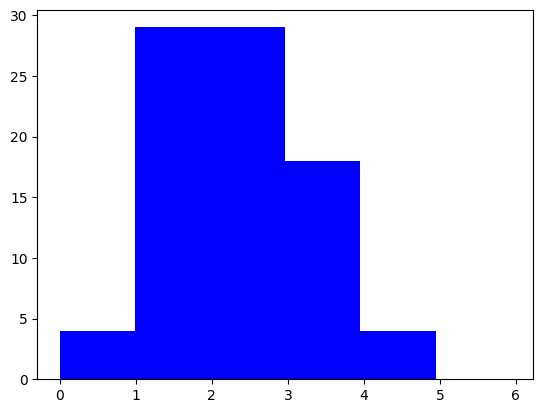

[ 4. 29. 29. 18.  4.  0.]
[0.    0.989 1.978 2.967 3.956 4.945 5.934]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13363038212678563
n0:  87.91821121524613
bin_size:  0.989
n0 / bin_size:  88.89606796283735
Cov:  [[3.86769654e-04 3.33475192e-03]
 [3.33475192e-03 8.94828647e+01]]
Max:  2.012677632604948
T1/2, mks:  7.483328148019674
Err(T1/2)+, mks:  -0.275601379420781
Err(T1/2)-, mks:  -2.5270165889609117


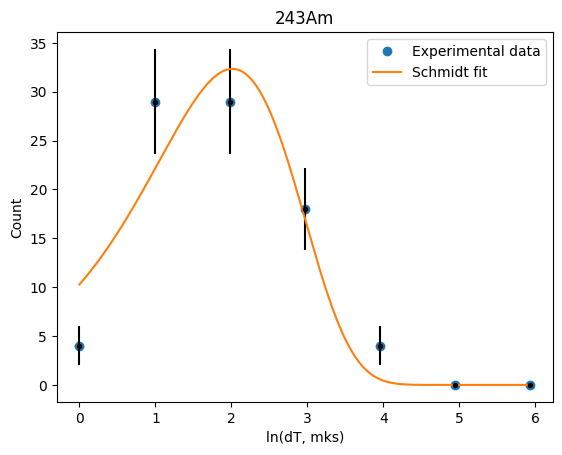


ITERATION:  988


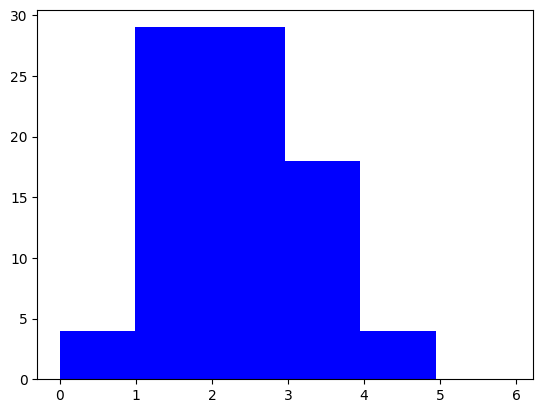

[ 4. 29. 29. 18.  4.  0.]
[0.    0.988 1.976 2.964 3.952 4.94  5.928]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13392855546950272
n0:  87.87628609246255
bin_size:  0.988
n0 / bin_size:  88.94360940532647
Cov:  [[3.88451775e-04 3.36699187e-03]
 [3.36699187e-03 8.93365514e+01]]
Max:  2.010448789353938
T1/2, mks:  7.4666675564025855
Err(T1/2)+, mks:  1.271753865775712
Err(T1/2)-, mks:  -0.974510525234555


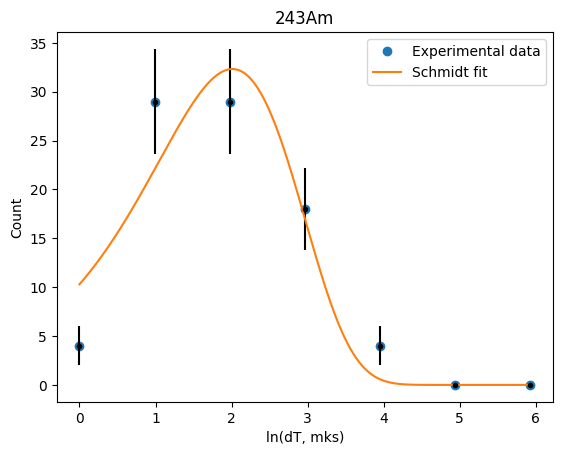


ITERATION:  987


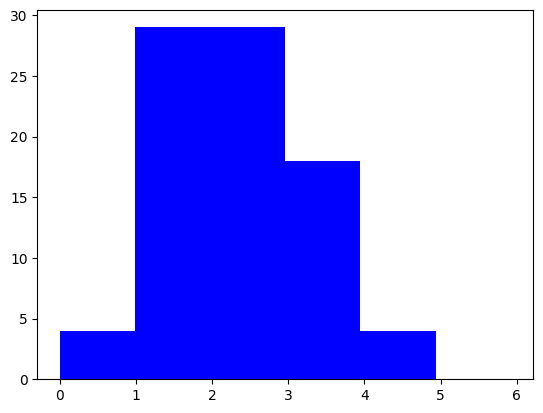

[ 4. 29. 29. 18.  4.  0.]
[0.    0.987 1.974 2.961 3.948 4.935 5.922]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13422718503131864
n0:  87.8343199267789
bin_size:  0.987
n0 / bin_size:  88.99120559957336
Cov:  [[3.90145786e-04 3.39922809e-03]
 [3.39922809e-03 8.91915672e+01]]
Max:  2.0082215039360563
T1/2, mks:  7.450055663215125
Err(T1/2)+, mks:  1.268858370414037
Err(T1/2)-, mks:  -0.9722878394966843


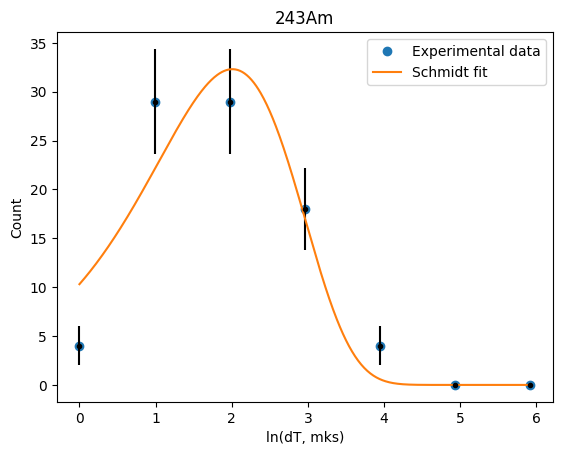


ITERATION:  986


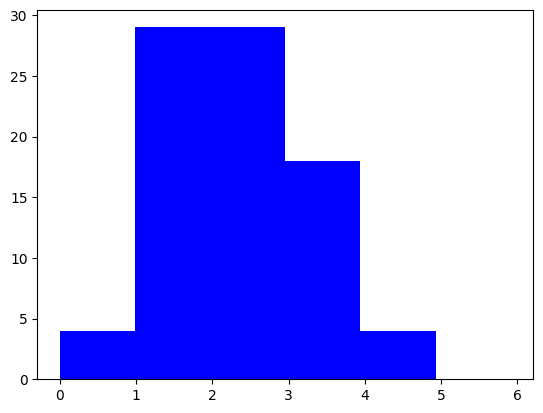

[ 4. 29. 29. 18.  4.  0.]
[0.    0.986 1.972 2.958 3.944 4.93  5.916]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13452627245958146
n0:  87.79231347453998
bin_size:  0.986
n0 / bin_size:  89.03885747924947
Cov:  [[3.91851712e-04 3.43146964e-03]
 [3.43146964e-03 8.90479088e+01]]
Max:  2.005995764743517
T1/2, mks:  7.43349222212673
Err(T1/2)+, mks:  1.265982355925705
Err(T1/2)-, mks:  -0.9700778969278003


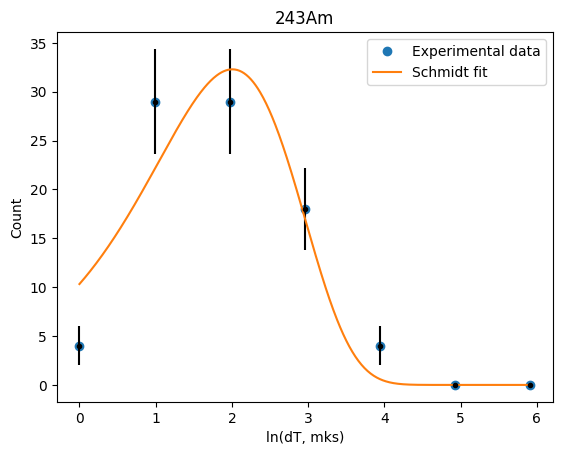


ITERATION:  985


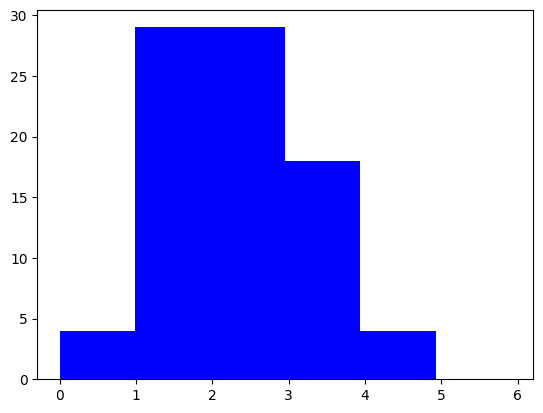

[ 4. 29. 29. 18.  4.  0.]
[0.    0.985 1.97  2.955 3.94  4.925 5.91 ]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1348258176009824
n0:  87.75026625566653
bin_size:  0.985
n0 / bin_size:  89.086564726565
Cov:  [[3.93569731e-04 3.46371423e-03]
 [3.46371423e-03 8.89055693e+01]]
Max:  2.003771573612706
T1/2, mks:  7.416977087871289
Err(T1/2)+, mks:  1.2631259851686343
Err(T1/2)-, mks:  -0.967880626333856


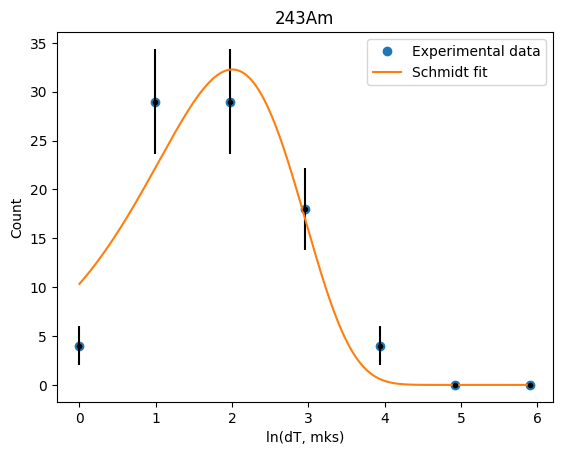


ITERATION:  984


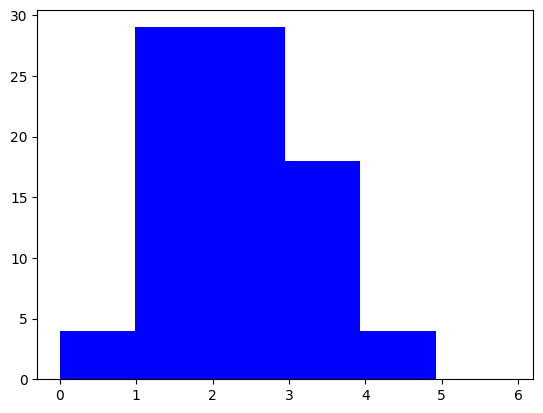

[ 4. 29. 29. 18.  4.  0.]
[0.    0.984 1.968 2.952 3.936 4.92  5.904]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13512582240253704
n0:  87.70817873804954
bin_size:  0.984
n0 / bin_size:  89.13432798582271
Cov:  [[3.95299930e-04 3.49596227e-03]
 [3.49596227e-03 8.87645494e+01]]
Max:  2.001548916806044
T1/2, mks:  7.400510000383351
Err(T1/2)+, mks:  1.2602889889537456
Err(T1/2)-, mks:  -0.9656960490345048


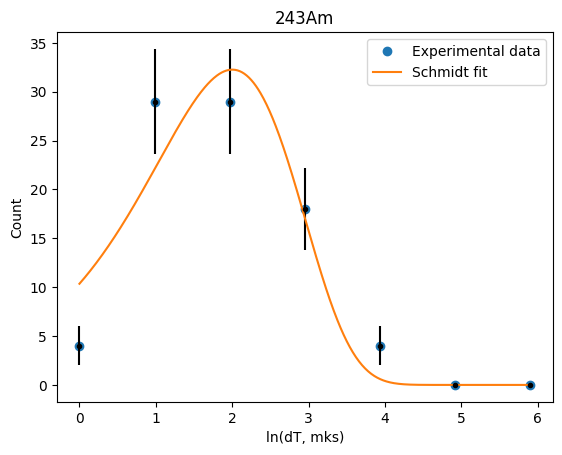


ITERATION:  983


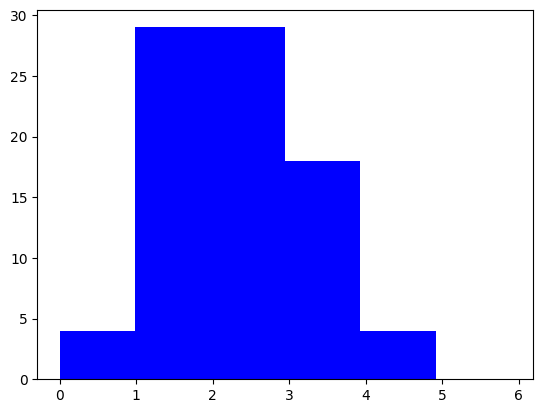

[ 4. 29. 29. 18.  4.  0.]
[0.    0.983 1.966 2.949 3.932 4.915 5.898]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1354262880074292
n0:  87.66605085975274
bin_size:  0.983
n0 / bin_size:  89.18214736495702
Cov:  [[3.97042354e-04 3.52821608e-03]
 [3.52821608e-03 8.86248453e+01]]
Max:  1.9993277866292085
T1/2, mks:  7.3840907456988125
Err(T1/2)+, mks:  1.2574711950596864
Err(T1/2)-, mks:  -0.9635239915393079


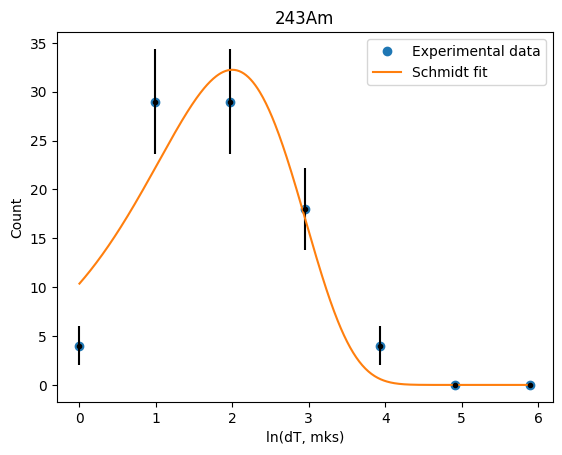


ITERATION:  982


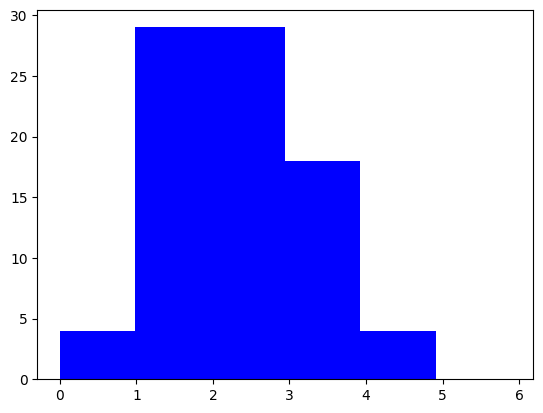

[ 4. 29. 29. 18.  4.  0.]
[0.    0.982 1.964 2.946 3.928 4.91  5.892]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1357272144691032
n0:  87.62388273830726
bin_size:  0.982
n0 / bin_size:  89.23002315509905
Cov:  [[3.98797136e-04 3.56047650e-03]
 [3.56047650e-03 8.84864472e+01]]
Max:  1.9971081834710573
T1/2, mks:  7.367719170481015
Err(T1/2)+, mks:  1.2546726388168308
Err(T1/2)-, mks:  -0.9613643744364104


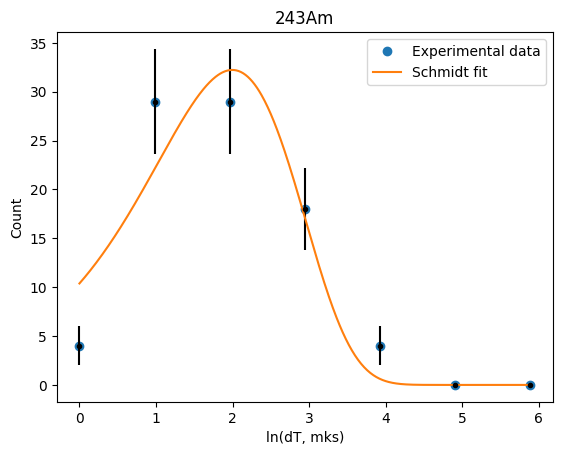


ITERATION:  981


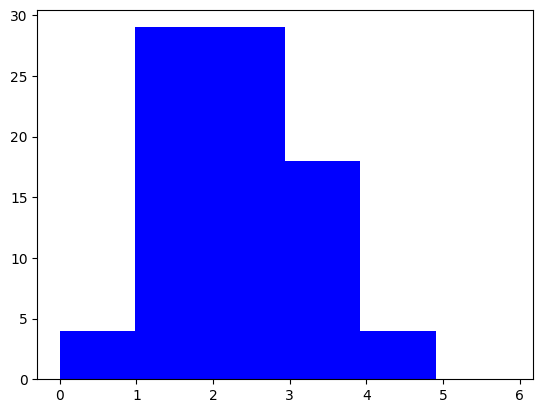

[ 4. 29. 29. 18.  4.  0.]
[0.    0.981 1.962 2.943 3.924 4.905 5.886]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1360286034774121
n0:  87.5816743977304
bin_size:  0.981
n0 / bin_size:  89.277955553242
Cov:  [[4.00564390e-04 3.59274492e-03]
 [3.59274492e-03 8.83493575e+01]]
Max:  1.994890095673316
T1/2, mks:  7.351395033369232
Err(T1/2)+, mks:  1.25189312920525
Err(T1/2)-, mks:  -0.9592172210390588


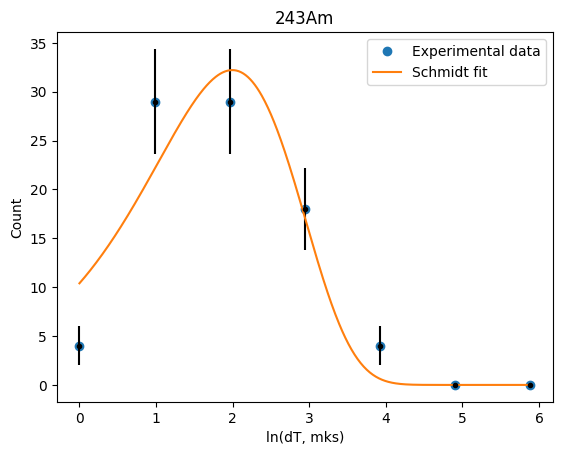


ITERATION:  980


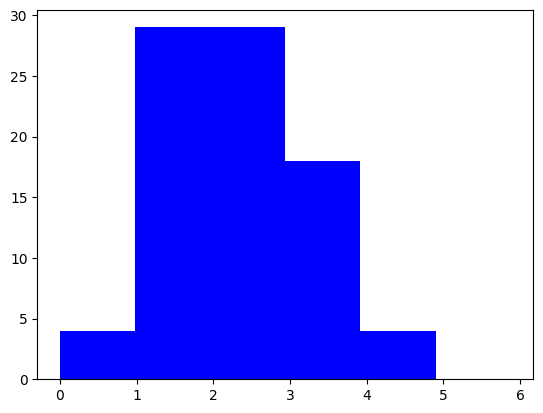

[ 4. 29. 29. 18.  4.  0.]
[0.   0.98 1.96 2.94 3.92 4.9  5.88]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1363304557880714
n0:  87.53942615632374
bin_size:  0.98
n0 / bin_size:  89.3259450574732
Cov:  [[4.02344177e-04 3.62502077e-03]
 [3.62502077e-03 8.82135667e+01]]
Max:  1.992673518519157
T1/2, mks:  7.335118145240571
Err(T1/2)+, mks:  1.249132540460912
Err(T1/2)-, mks:  -0.95708237457454


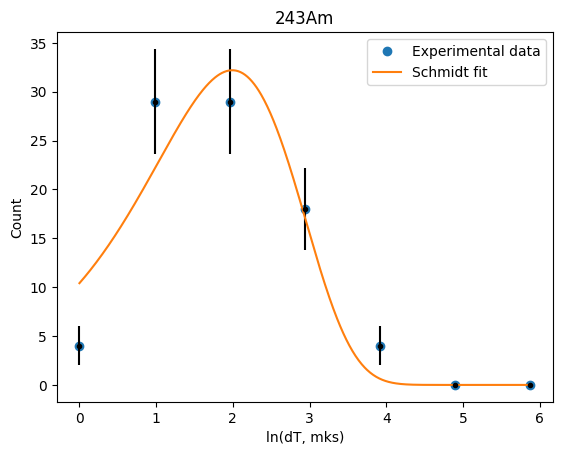


ITERATION:  979


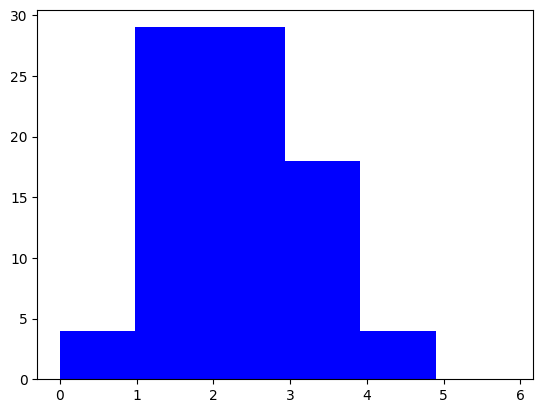

[ 4. 29. 29. 18.  4.  0.]
[0.    0.979 1.958 2.937 3.916 4.895 5.874]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13663277326068085
n0:  87.497137934311
bin_size:  0.979
n0 / bin_size:  89.37399176129827
Cov:  [[4.04136647e-04 3.65730520e-03]
 [3.65730520e-03 8.80790750e+01]]
Max:  1.9904584392407139
T1/2, mks:  7.318888258910664
Err(T1/2)+, mks:  1.246390775341922
Err(T1/2)-, mks:  -0.9549598633129781


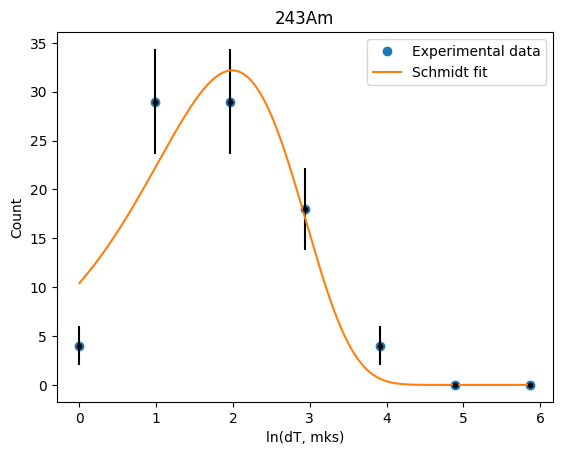


ITERATION:  978


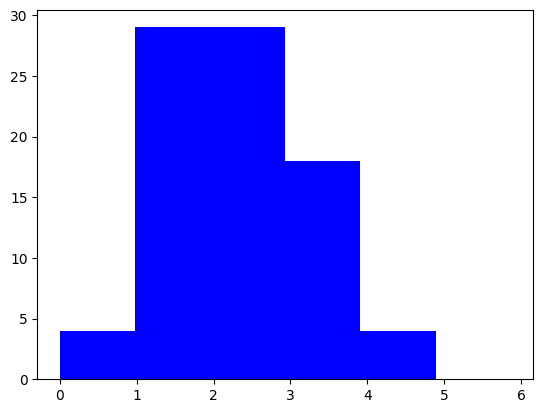

[ 4. 29. 29. 18.  4.  0.]
[0.    0.978 1.956 2.934 3.912 4.89  5.868]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13693555625659137
n0:  87.45480988092558
bin_size:  0.978
n0 / bin_size:  89.42209599276644
Cov:  [[4.05941866e-04 3.68960576e-03]
 [3.68960576e-03 8.79458779e+01]]
Max:  1.9882448561108252
T1/2, mks:  7.302705209202122
Err(T1/2)+, mks:  1.2436677527050586
Err(T1/2)-, mks:  -0.9528495095483525


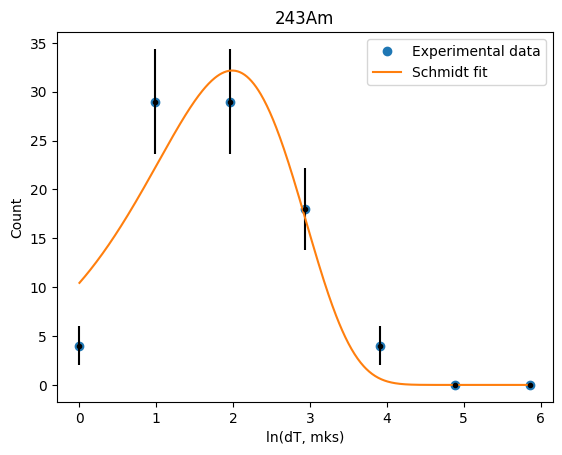


ITERATION:  977


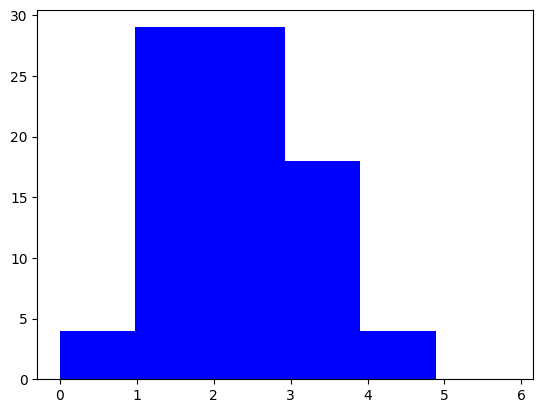

[ 4. 29. 29. 18.  4.  0.]
[0.    0.977 1.954 2.931 3.908 4.885 5.862]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13723880580547385
n0:  87.41244191491833
bin_size:  0.977
n0 / bin_size:  89.47025784536166
Cov:  [[4.07759938e-04 3.72190648e-03]
 [3.72190648e-03 8.78139678e+01]]
Max:  1.9860327625346004
T1/2, mks:  7.286568796127738
Err(T1/2)+, mks:  1.240963331626384
Err(T1/2)-, mks:  -0.9507512826944842


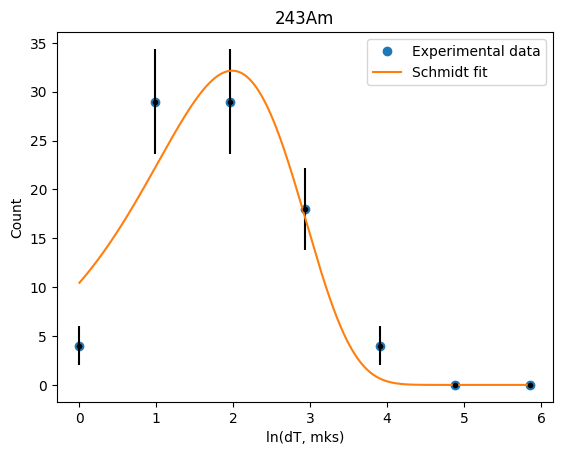


ITERATION:  976


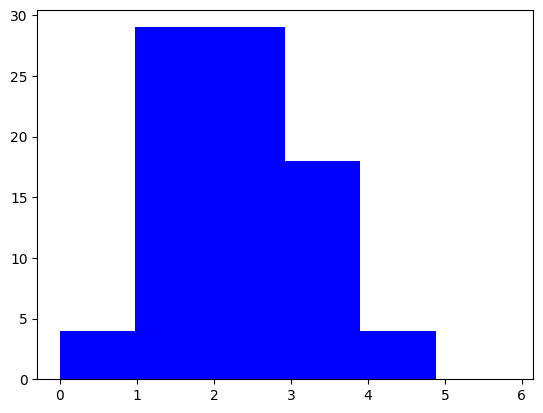

[ 4. 29. 29. 18.  4.  0.]
[0.    0.976 1.952 2.928 3.904 4.88  5.856]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1375425238256188
n0:  87.37003455205505
bin_size:  0.976
n0 / bin_size:  89.51847802464657
Cov:  [[4.09590986e-04 3.75423149e-03]
 [3.75423149e-03 8.76833448e+01]]
Max:  1.9838221455015035
T1/2, mks:  7.270478774025078
Err(T1/2)+, mks:  1.2382773743633626
Err(T1/2)-, mks:  -0.9486651692137


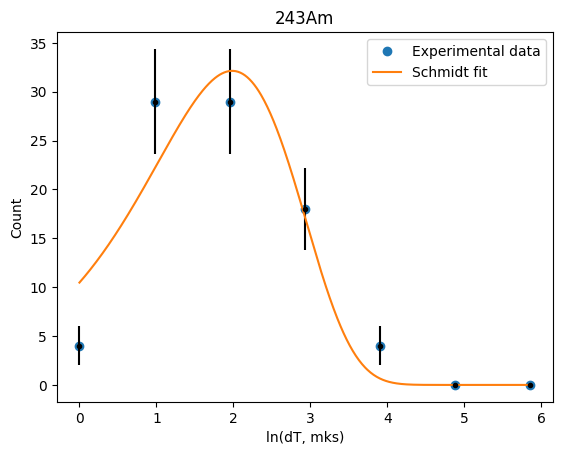


ITERATION:  975


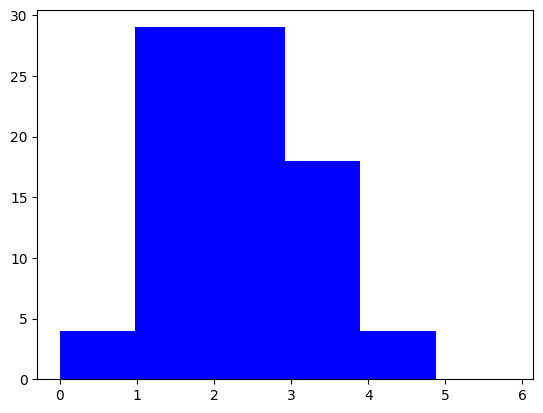

[ 4. 29. 29. 18.  4.  0.]
[0.    0.975 1.95  2.925 3.9   4.875 5.85 ]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13784671110342328
n0:  87.32758752236364
bin_size:  0.975
n0 / bin_size:  89.56675643319348
Cov:  [[4.11435099e-04 3.78656874e-03]
 [3.78656874e-03 8.75540047e+01]]
Max:  1.9816130003140102
T1/2, mks:  7.254434958914055
Err(T1/2)+, mks:  1.235609810869093
Err(T1/2)-, mks:  -0.9465910282401682


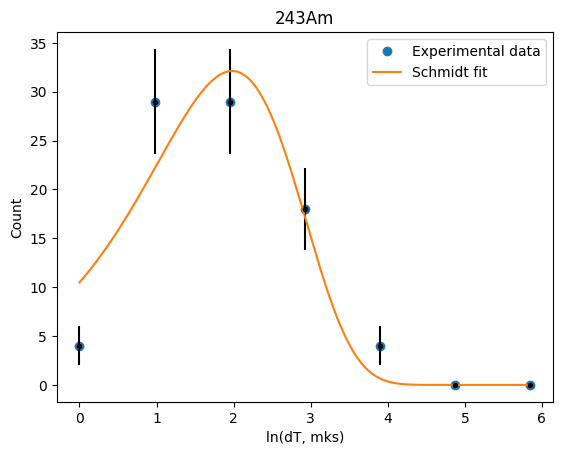


ITERATION:  974


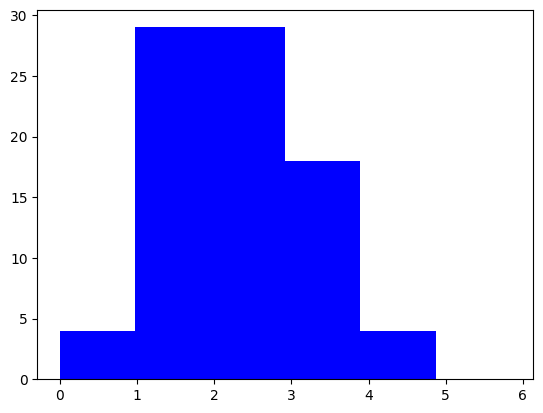

[ 4. 29. 29. 18.  4.  0.]
[0.    0.974 1.948 2.922 3.896 4.87  5.844]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13815136865790778
n0:  87.28510097082855
bin_size:  0.974
n0 / bin_size:  89.61509339920796
Cov:  [[4.13292379e-04 3.81891560e-03]
 [3.81891560e-03 8.74259418e+01]]
Max:  1.9794053206193842
T1/2, mks:  7.23843715566954
Err(T1/2)+, mks:  1.2329605174124962
Err(T1/2)-, mks:  -0.9445288018743296


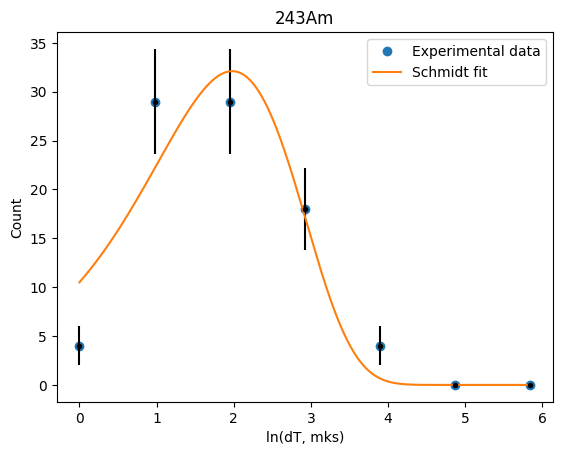


ITERATION:  973


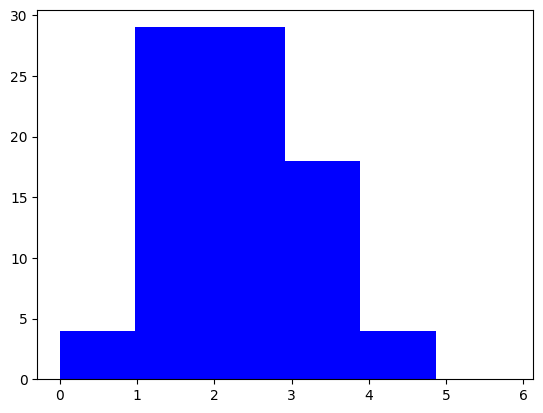

[ 4. 29. 29. 18.  4.  0.]
[0.    0.973 1.946 2.919 3.892 4.865 5.838]
[2.         5.38516481 5.38516481 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13845649858977954
n0:  87.24257530066892
bin_size:  0.973
n0 / bin_size:  89.66348951764535
Cov:  [[4.15162934e-04 3.85128202e-03]
 [3.85128202e-03 8.72991509e+01]]
Max:  1.9771990922956946
T1/2, mks:  7.22248511399101
Err(T1/2)+, mks:  1.2303293164901854
Err(T1/2)-, mks:  -0.9424784689718608


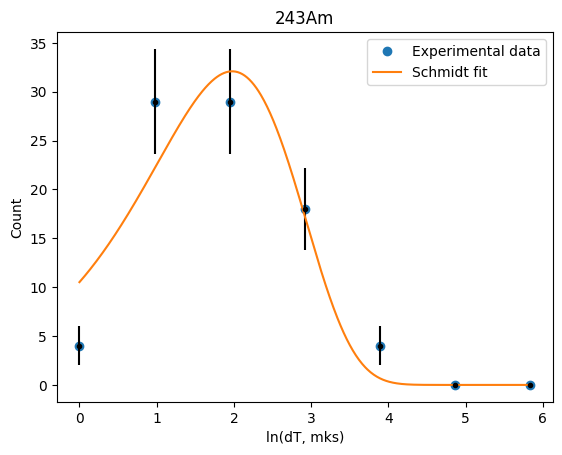


ITERATION:  972


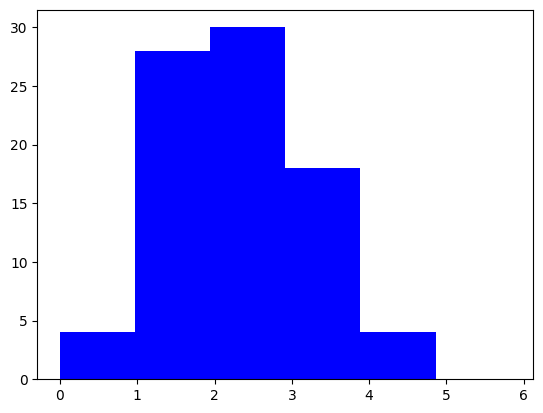

[ 4. 28. 30. 18.  4.  0.]
[0.    0.972 1.944 2.916 3.888 4.86  5.832]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13685654082402582
n0:  87.63362298681288
bin_size:  0.972
n0 / bin_size:  90.15804834034248
Cov:  [[3.36408871e-04 3.31827274e-03]
 [3.31827274e-03 7.29135564e+01]]
Max:  1.9888220490656383
T1/2, mks:  7.306921495888381
Err(T1/2)+, mks:  1.2152590765154203
Err(T1/2)-, mks:  -0.7791028246047693


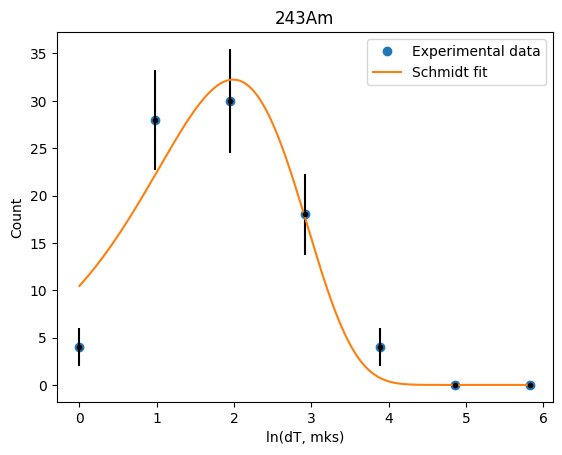


ITERATION:  971


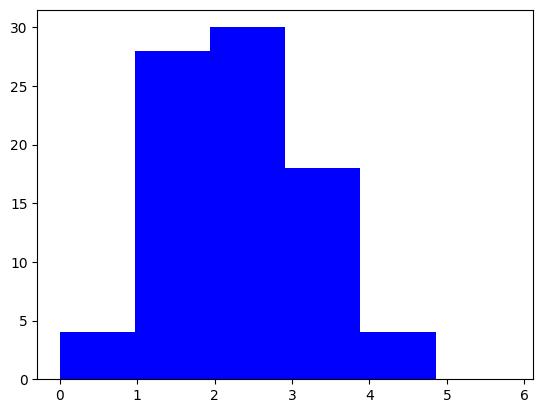

[ 4. 28. 30. 18.  4.  0.]
[0.    0.971 1.942 2.913 3.884 4.855 5.826]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13715830588947378
n0:  87.58971193225156
bin_size:  0.971
n0 / bin_size:  90.20567655226732
Cov:  [[3.38086728e-04 3.34439226e-03]
 [3.34439226e-03 7.28374013e+01]]
Max:  1.9866195028090314
T1/2, mks:  7.290845374000387
Err(T1/2)+, mks:  1.1126300773185376
Err(T1/2)-, mks:  -0.8779320297653577


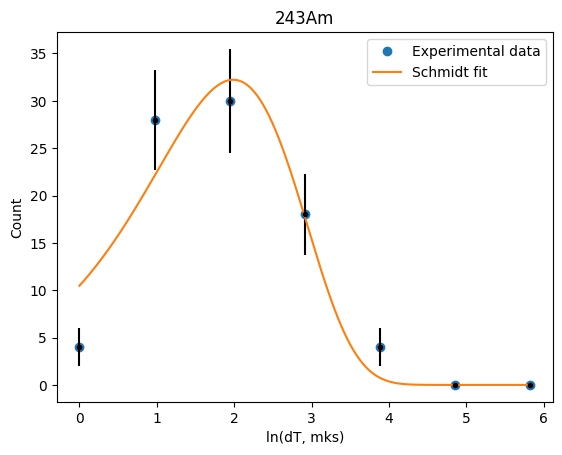


ITERATION:  970


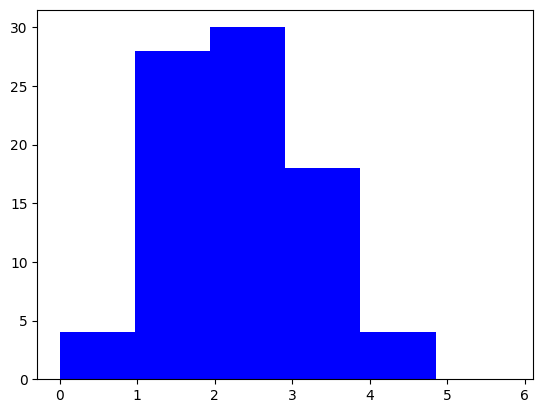

[ 4. 28. 30. 18.  4.  0.]
[0.   0.97 1.94 2.91 3.88 4.85 5.82]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13746054822067644
n0:  87.5457650509665
bin_size:  0.97
n0 / bin_size:  90.25336603192423
Cov:  [[3.39777623e-04 3.37055025e-03]
 [3.37055025e-03 7.27623900e+01]]
Max:  1.9844183250769565
T1/2, mks:  7.274814577304172
Err(T1/2)+, mks:  1.110575147810053
Err(T1/2)-, mks:  -0.8762141071588321


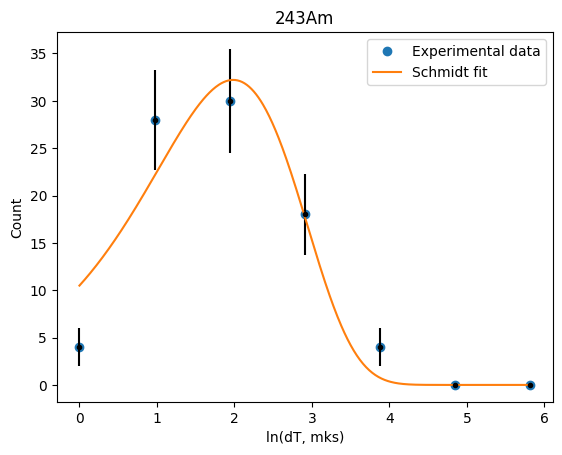


ITERATION:  969


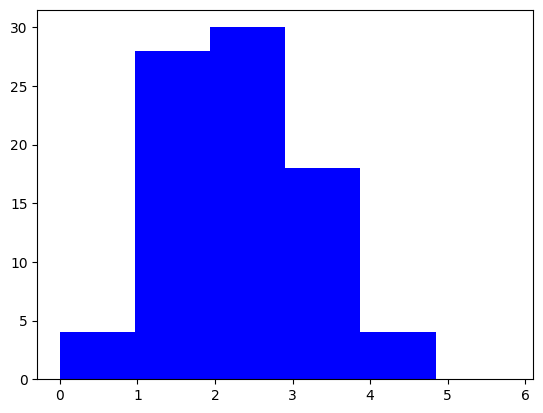

[ 4. 28. 30. 18.  4.  0.]
[0.    0.969 1.938 2.907 3.876 4.845 5.814]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.1377632698330047
n0:  87.50178236909935
bin_size:  0.969
n0 / bin_size:  90.30111699597455
Cov:  [[3.41481636e-04 3.39674395e-03]
 [3.39674395e-03 7.26885209e+01]]
Max:  1.9822185028628254
T1/2, mks:  7.258828867899189
Err(T1/2)+, mks:  1.1085360540444746
Err(T1/2)-, mks:  -0.8745070168190106


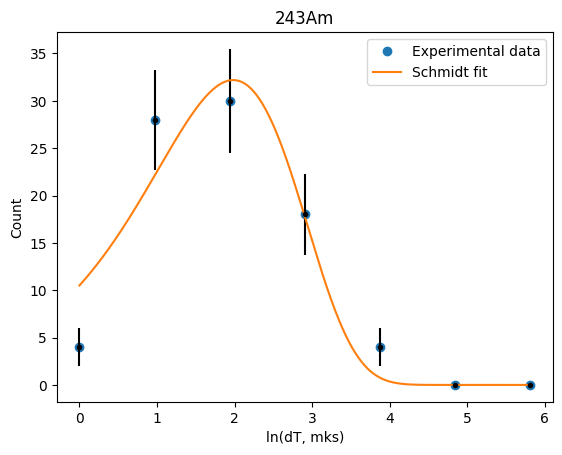


ITERATION:  968


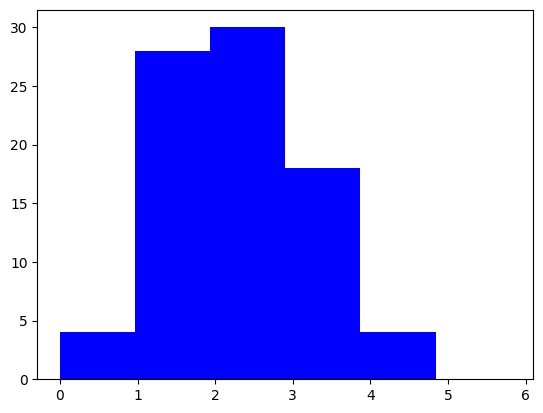

[ 4. 28. 30. 18.  4.  0.]
[0.    0.968 1.936 2.904 3.872 4.84  5.808]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13806647259794086
n0:  87.45776421050827
bin_size:  0.968
n0 / bin_size:  90.34892996953334
Cov:  [[3.43198927e-04 3.42298339e-03]
 [3.42298339e-03 7.26157940e+01]]
Max:  1.9800200243058237
T1/2, mks:  7.242888017513631
Err(T1/2)+, mks:  1.106512794492656
Err(T1/2)-, mks:  -0.8728107333681105


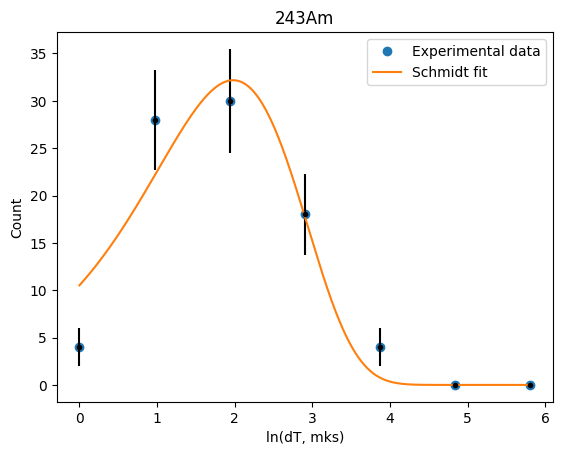


ITERATION:  967


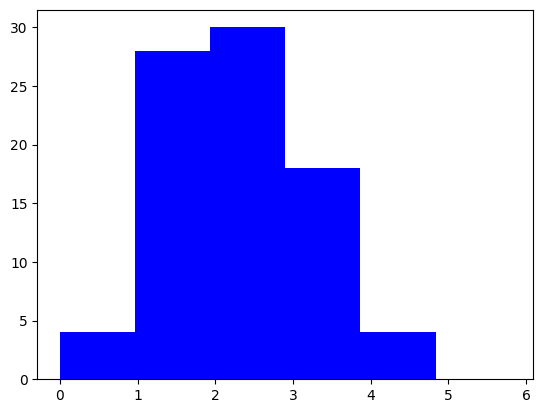

[ 4. 28. 30. 18.  4.  0.]
[0.    0.967 1.934 2.901 3.868 4.835 5.802]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13837015714147133
n0:  87.41371039407528
bin_size:  0.967
n0 / bin_size:  90.39680495767868
Cov:  [[3.44929540e-04 3.44926251e-03]
 [3.44926251e-03 7.25441998e+01]]
Max:  1.9778228866400642
T1/2, mks:  7.226991864854123
Err(T1/2)+, mks:  1.1045052248641634
Err(T1/2)-, mks:  -0.8711250592640747


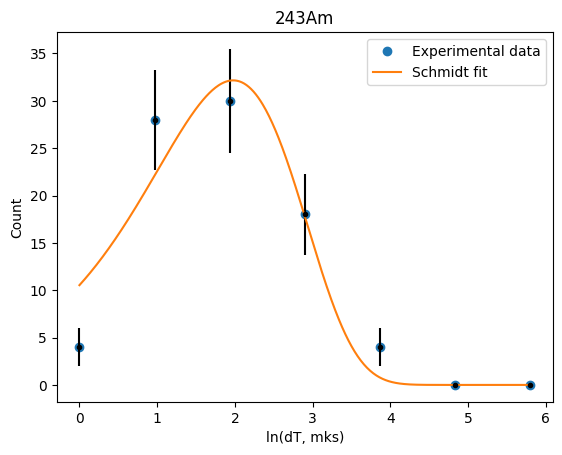


ITERATION:  966


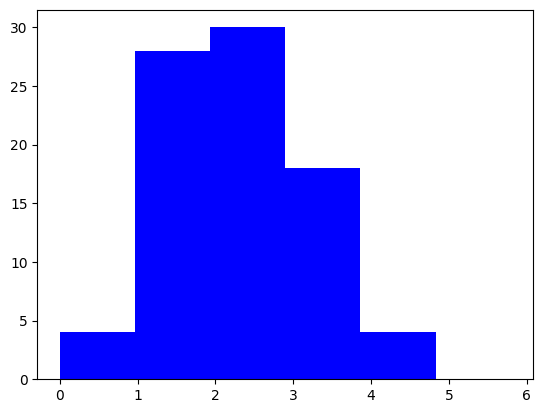

[ 4. 28. 30. 18.  4.  0.]
[0.    0.966 1.932 2.898 3.864 4.83  5.796]
[2.         5.29150262 5.47722558 4.24264069 2.         0.
 0.        ]

SF count:  84.0
Lambda:  0.13867432461467927
n0:  87.36962108808554
bin_size:  0.966
n0 / bin_size:  90.4447423272107
Cov:  [[3.46673637e-04 3.47558087e-03]
 [3.47558087e-03 7.24737366e+01]]
Max:  1.9756270833272307
T1/2, mks:  7.21114022208943
Err(T1/2)+, mks:  1.1025133176955757
Err(T1/2)-, mks:  -0.8694500122678113


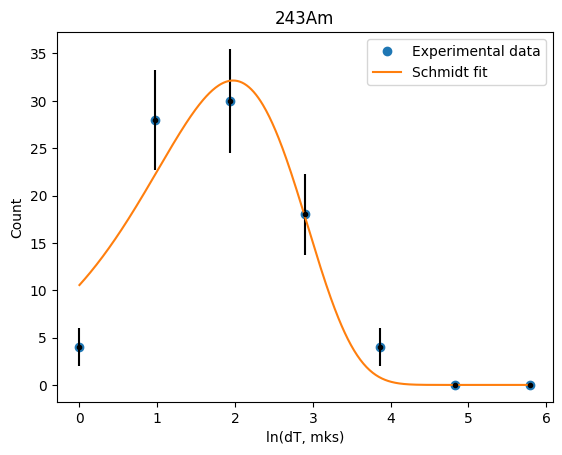


ITERATION:  965

ITERATION:  964

ITERATION:  963

ITERATION:  962

ITERATION:  961

ITERATION:  960

ITERATION:  959

ITERATION:  958

ITERATION:  957

ITERATION:  956

ITERATION:  955

ITERATION:  954

ITERATION:  953

ITERATION:  952

ITERATION:  951

ITERATION:  950

ITERATION:  949

ITERATION:  948

ITERATION:  947

ITERATION:  946

ITERATION:  945

ITERATION:  944

ITERATION:  943

ITERATION:  942

ITERATION:  941

ITERATION:  940

ITERATION:  939

ITERATION:  938

ITERATION:  937

ITERATION:  936

ITERATION:  935

ITERATION:  934

ITERATION:  933

ITERATION:  932

ITERATION:  931

ITERATION:  930

ITERATION:  929

ITERATION:  928

ITERATION:  927

ITERATION:  926

ITERATION:  925

ITERATION:  924

ITERATION:  923

ITERATION:  922

ITERATION:  921

ITERATION:  920


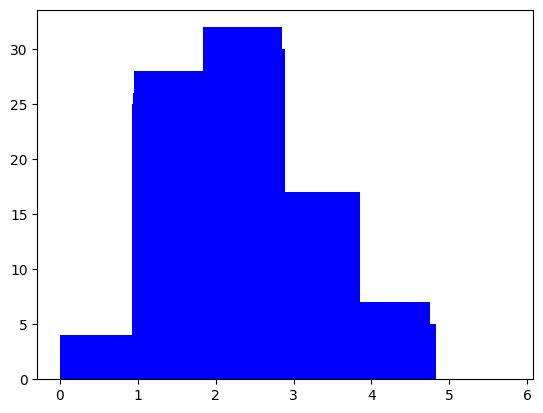

[ 4. 24. 32. 17.  7.  0.]
[0.   0.92 1.84 2.76 3.68 4.6  5.52]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.1456061139562881
n0:  83.45997864071802
bin_size:  0.92
n0 / bin_size:  90.71736808773697
Cov:  [[3.93688462e-04 4.33035126e-03]
 [4.33035126e-03 6.54703216e+01]]
Max:  1.9268501526431452
T1/2, mks:  6.867843477370781
Err(T1/2)+, mks:  0.7402273187086132
Err(T1/2)-, mks:  -1.1669340386185656


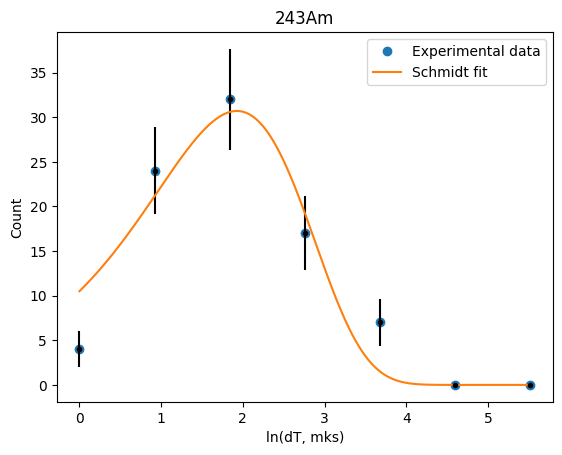


ITERATION:  919


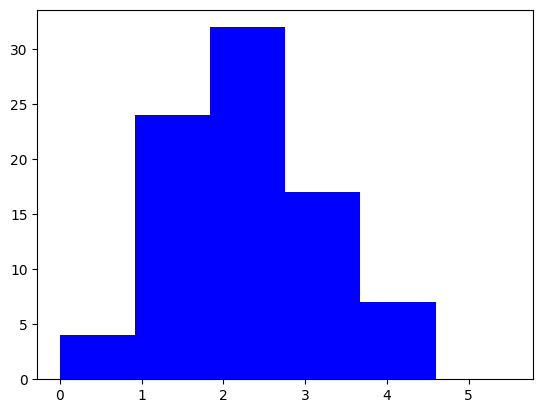

[ 4. 24. 32. 17.  7.  0.]
[0.    0.919 1.838 2.757 3.676 4.595 5.514]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.14589461702507237
n0:  83.41380753755378
bin_size:  0.919
n0 / bin_size:  90.76584062845895
Cov:  [[3.96035525e-04 4.35171352e-03]
 [4.35171352e-03 6.54858146e+01]]
Max:  1.9248707190958398
T1/2, mks:  6.854262483365972
Err(T1/2)+, mks:  1.0690439360672226
Err(T1/2)-, mks:  -0.8363078953199219


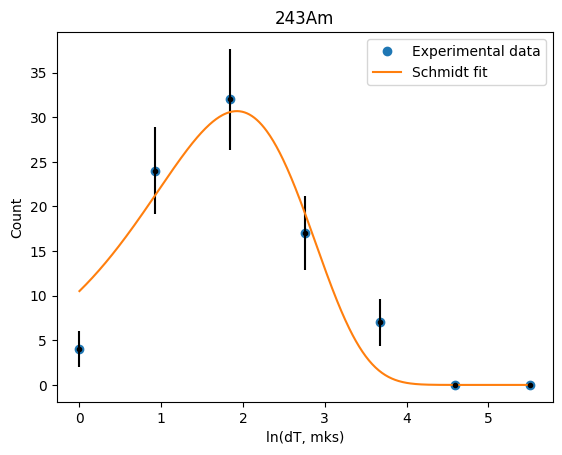


ITERATION:  918


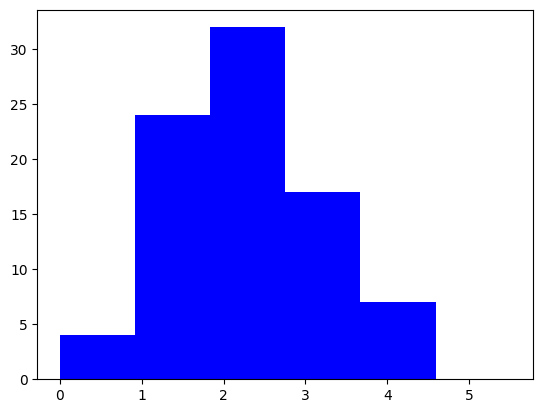

[ 4. 24. 32. 17.  7.  0.]
[0.    0.918 1.836 2.754 3.672 4.59  5.508]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.14618355710535053
n0:  83.36762229299033
bin_size:  0.918
n0 / bin_size:  90.81440336927051
Cov:  [[3.98397059e-04 4.37309760e-03]
 [4.37309760e-03 6.55016608e+01]]
Max:  1.9228922064911693
T1/2, mks:  6.840714645350483
Err(T1/2)+, mks:  1.0681818028203969
Err(T1/2)-, mks:  -0.8353671249762122


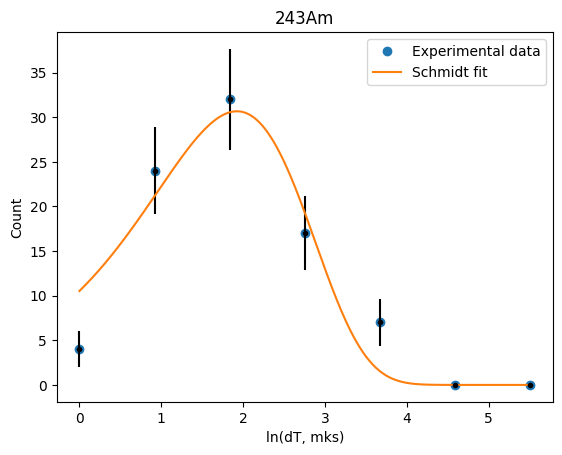


ITERATION:  917


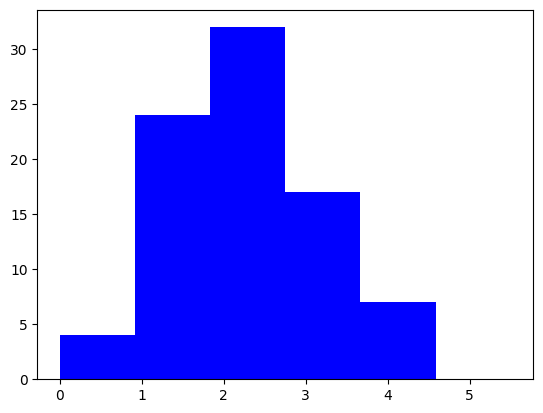

[ 4. 24. 32. 17.  7.  0.]
[0.    0.917 1.834 2.751 3.668 4.585 5.502]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.14647293776503764
n0:  83.32142297964599
bin_size:  0.917
n0 / bin_size:  90.86305668445581
Cov:  [[4.00773209e-04 4.39450674e-03]
 [4.39450674e-03 6.55178598e+01]]
Max:  1.9209145927421343
T1/2, mks:  6.827199722068352
Err(T1/2)+, mks:  1.0673232958647976
Err(T1/2)-, mks:  -0.8344293799636011


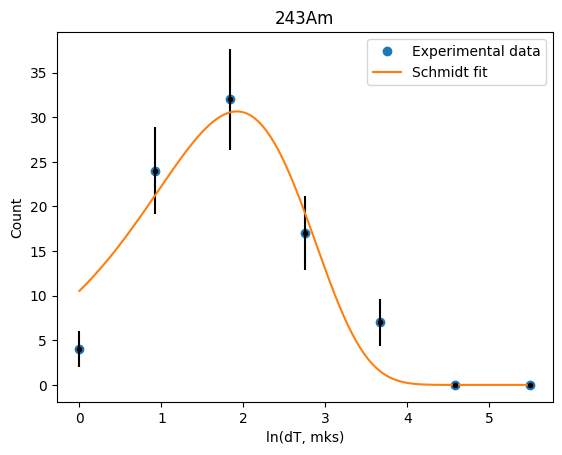


ITERATION:  916


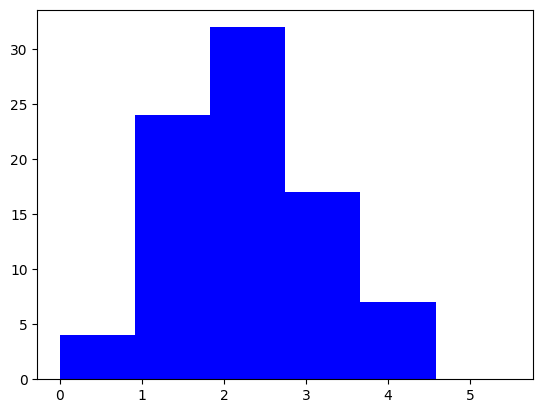

[ 4. 24. 32. 17.  7.  0.]
[0.    0.916 1.832 2.748 3.664 4.58  5.496]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.14676276374669148
n0:  83.27520949794466
bin_size:  0.916
n0 / bin_size:  90.91180076194831
Cov:  [[4.03164042e-04 4.41594260e-03]
 [4.41594260e-03 6.55344110e+01]]
Max:  1.9189378479287658
T1/2, mks:  6.813717420353113
Err(T1/2)+, mks:  1.0664682441918014
Err(T1/2)-, mks:  -0.8334946342864766


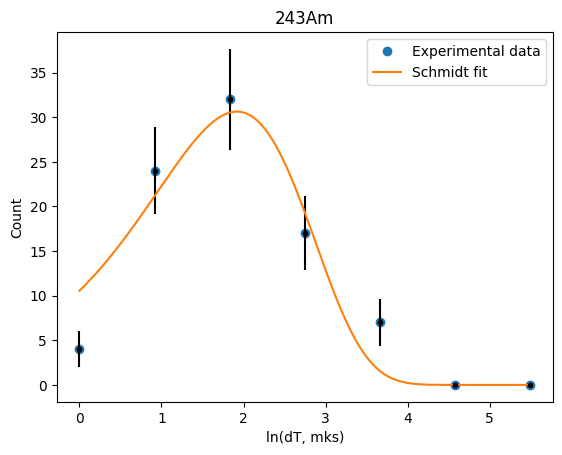


ITERATION:  915


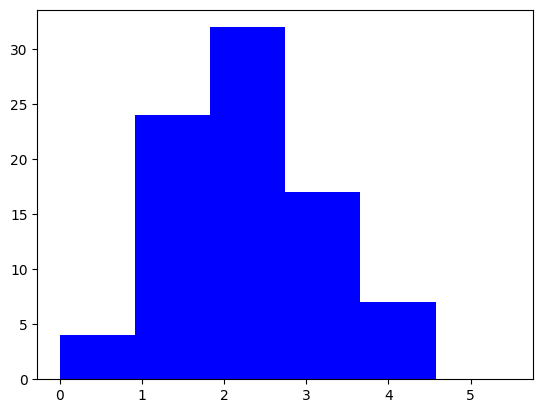

[ 4. 24. 32. 17.  7.  0.]
[0.    0.915 1.83  2.745 3.66  4.575 5.49 ]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.1470530393568784
n0:  83.22898193974157
bin_size:  0.915
n0 / bin_size:  90.96063599971757
Cov:  [[4.05569650e-04 4.43740840e-03]
 [4.43740840e-03 6.55513138e+01]]
Max:  1.9169619453288258
T1/2, mks:  6.800267470658198
Err(T1/2)+, mks:  1.065616601543982
Err(T1/2)-, mks:  -0.8325628155640583


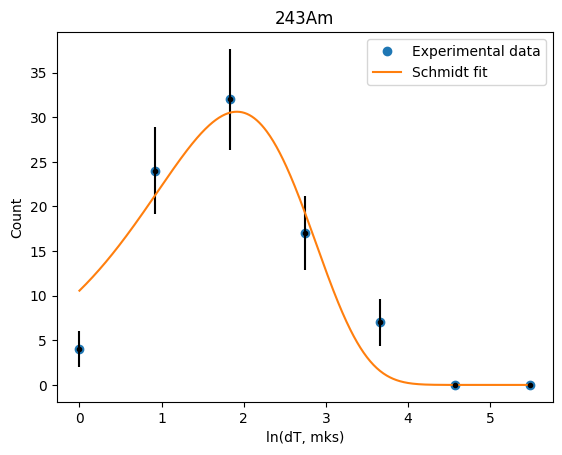


ITERATION:  914


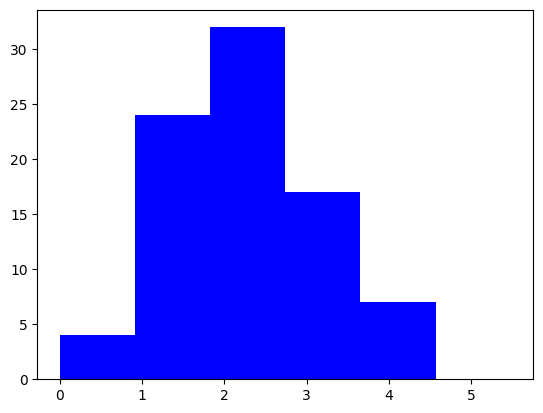

[ 4. 24. 32. 17.  7.  0.]
[0.    0.914 1.828 2.742 3.656 4.57  5.484]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.1473437699455188
n0:  83.1827403481375
bin_size:  0.914
n0 / bin_size:  91.00956274413294
Cov:  [[4.07990099e-04 4.45890474e-03]
 [4.45890474e-03 6.55685680e+01]]
Max:  1.9149868513470611
T1/2, mks:  6.7868495584832385
Err(T1/2)+, mks:  1.0647681930694413
Err(T1/2)-, mks:  -0.8316338841559174


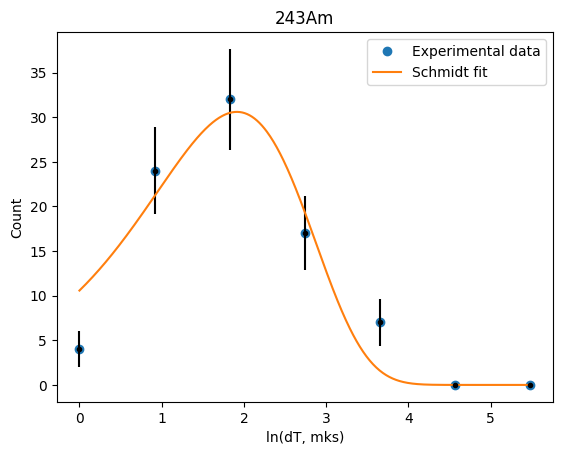


ITERATION:  913


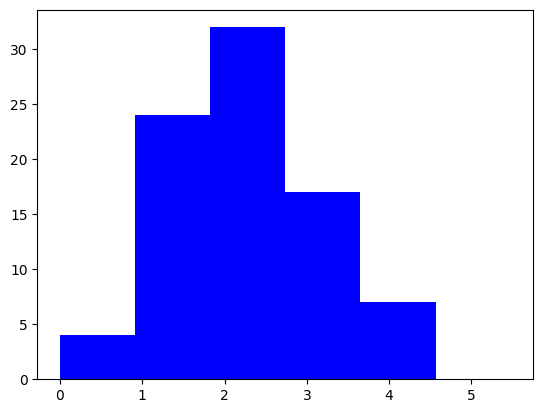

[ 4. 24. 32. 17.  7.  0.]
[0.    0.913 1.826 2.739 3.652 4.565 5.478]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.1476349602029808
n0:  83.13648470091859
bin_size:  0.913
n0 / bin_size:  91.0585812715428
Cov:  [[4.10425482e-04 4.48043095e-03]
 [4.48043095e-03 6.55861728e+01]]
Max:  1.9130125371183593
T1/2, mks:  6.773463403418248
Err(T1/2)+, mks:  1.0639229776253059
Err(T1/2)-, mks:  -0.8307077539418639


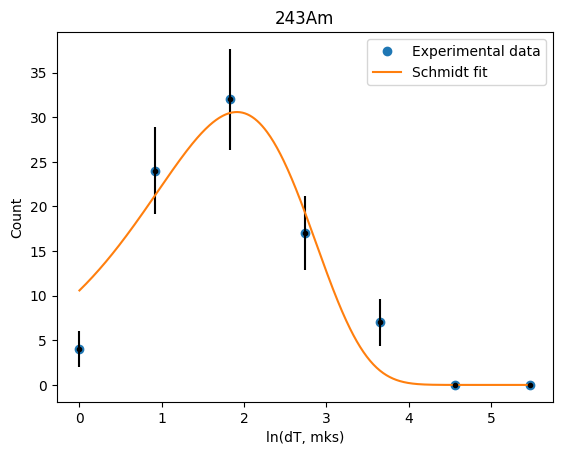


ITERATION:  912


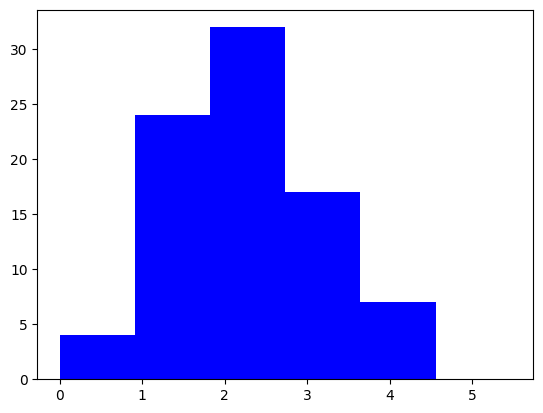

[ 4. 24. 32. 17.  7.  0.]
[0.    0.912 1.824 2.736 3.648 4.56  5.472]
[2.         4.89897949 5.65685425 4.12310563 2.64575131 0.
 0.        ]

SF count:  84.0
Lambda:  0.14792661444493357
n0:  83.09021505015498
bin_size:  0.912
n0 / bin_size:  91.10769194095941
Cov:  [[4.12875915e-04 4.50199303e-03]
 [4.50199303e-03 6.56041271e+01]]
Max:  1.9110389765365086
T1/2, mks:  6.7601087454905215
Err(T1/2)+, mks:  1.0630809419372511
Err(T1/2)-, mks:  -0.8297843769810838


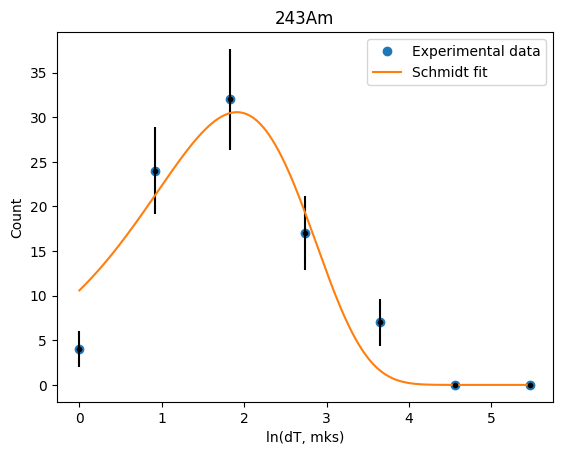


ITERATION:  911


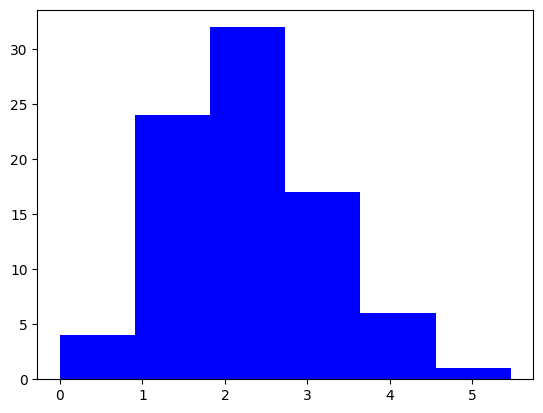

[ 4. 24. 32. 17.  6.  1.]
[0.    0.911 1.822 2.733 3.644 4.555 5.466]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.14949639882099675
n0:  82.98693644574249
bin_size:  0.911
n0 / bin_size:  91.09433199313116
Cov:  [[3.80350249e-04 4.12699325e-03]
 [4.12699325e-03 5.91180997e+01]]
Max:  1.9004829745953882
T1/2, mks:  6.68912433935867
Err(T1/2)+, mks:  0.9325641416784647
Err(T1/2)-, mks:  -0.8429128887581703


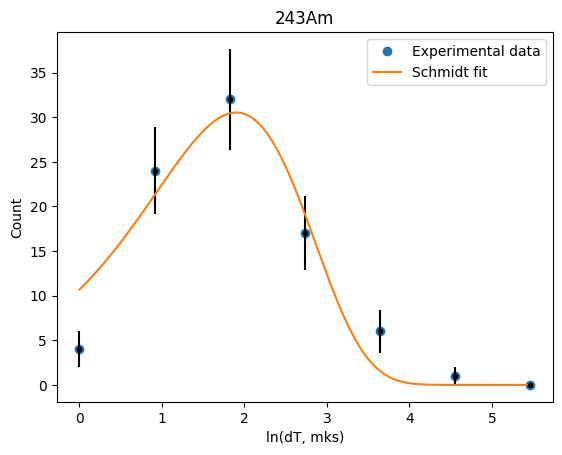


ITERATION:  910

ITERATION:  909

ITERATION:  908

ITERATION:  907


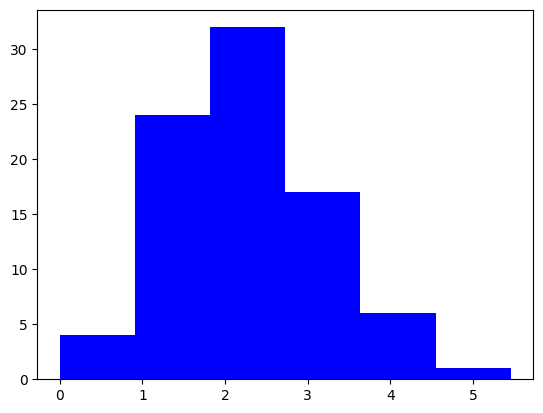

[ 4. 24. 32. 17.  6.  1.]
[0.    0.907 1.814 2.721 3.628 4.535 5.442]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.1507153211488075
n0:  82.79971274431725
bin_size:  0.907
n0 / bin_size:  91.28965021424173
Cov:  [[3.90495948e-04 4.22094389e-03]
 [4.22094389e-03 5.93066362e+01]]
Max:  1.8923625119692218
T1/2, mks:  6.635025506216839
Err(T1/2)+, mks:  0.9471244271866972
Err(T1/2)-, mks:  -0.8232060266619321


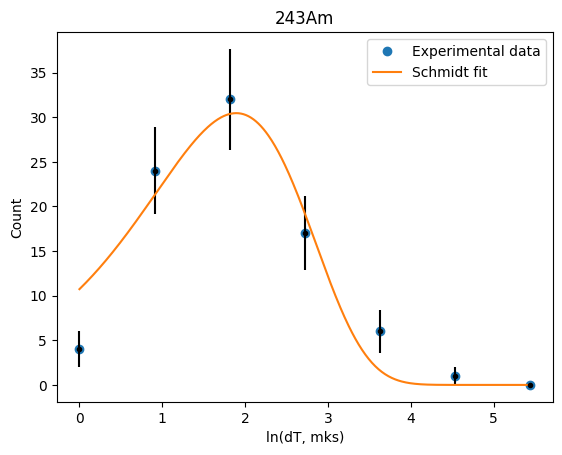


ITERATION:  906

ITERATION:  905

ITERATION:  904


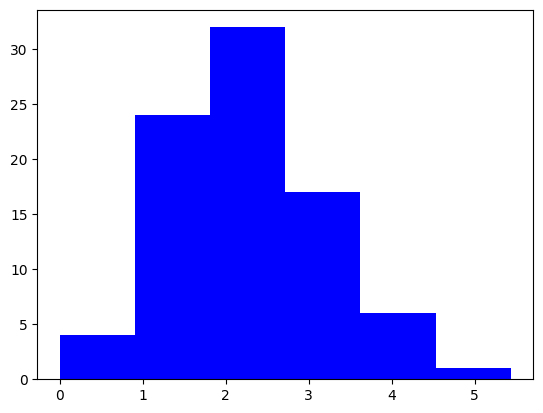

[ 4. 24. 32. 17.  6.  1.]
[0.    0.904 1.808 2.712 3.616 4.52  5.424]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.15163527776996655
n0:  82.65911421300319
bin_size:  0.904
n0 / bin_size:  91.43707324447256
Cov:  [[3.98296293e-04 4.29240551e-03]
 [4.29240551e-03 5.94526189e+01]]
Max:  1.8862771298768848
T1/2, mks:  6.594771445712112
Err(T1/2)+, mks:  0.9592623681965629
Err(T1/2)-, mks:  -0.8072697116675531


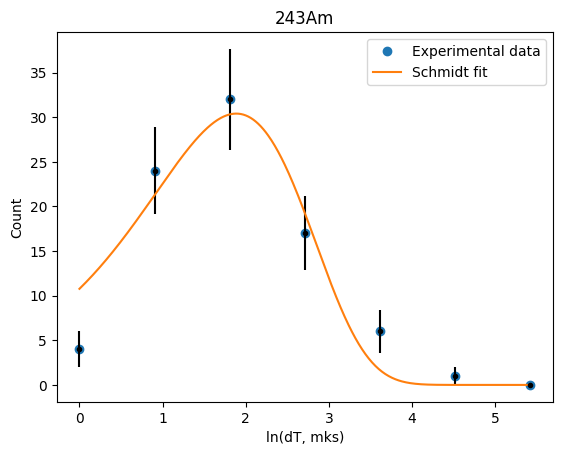


ITERATION:  903

ITERATION:  902

ITERATION:  901


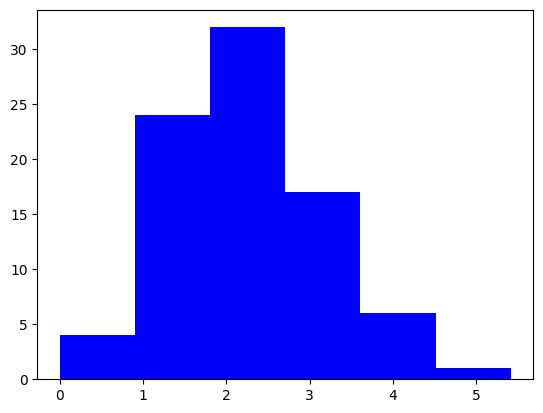

[ 4. 24. 32. 17.  6.  1.]
[0.    0.901 1.802 2.703 3.604 4.505 5.406]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.15256032118148444
n0:  82.51836069041154
bin_size:  0.901
n0 / bin_size:  91.58530598269871
Cov:  [[4.06264316e-04 4.36480422e-03]
 [4.36480422e-03 5.96025239e+01]]
Max:  1.8801952124124017
T1/2, mks:  6.554784312563217
Err(T1/2)+, mks:  0.9578521186262465
Err(T1/2)-, mks:  -0.8049306472788675


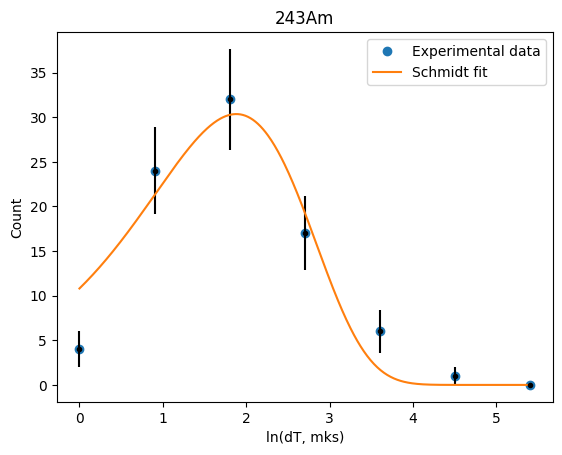


ITERATION:  900

ITERATION:  899

ITERATION:  898


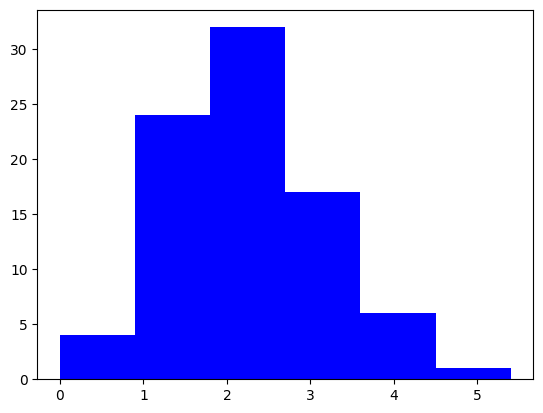

[ 4. 24. 32. 17.  6.  1.]
[0.    0.898 1.796 2.694 3.592 4.49  5.388]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.15349058607513652
n0:  82.37745175805118
bin_size:  0.898
n0 / bin_size:  91.73435607800799
Cov:  [[4.14403715e-04 4.43821396e-03]
 [4.43821396e-03 5.97563456e+01]]
Max:  1.874116042336294
T1/2, mks:  6.515057539167134
Err(T1/2)+, mks:  0.9564631535156751
Err(T1/2)-, mks:  -0.8026162774806114


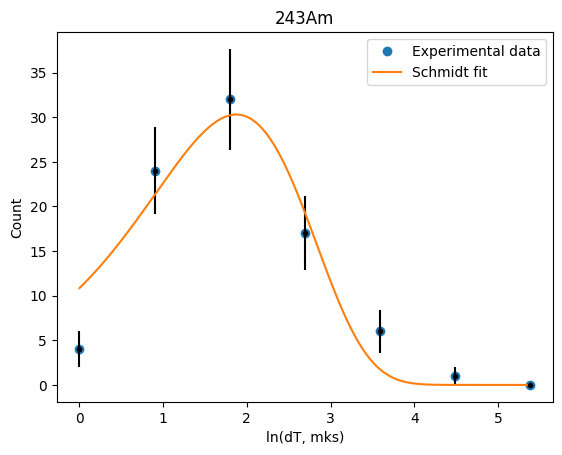


ITERATION:  897

ITERATION:  896

ITERATION:  895


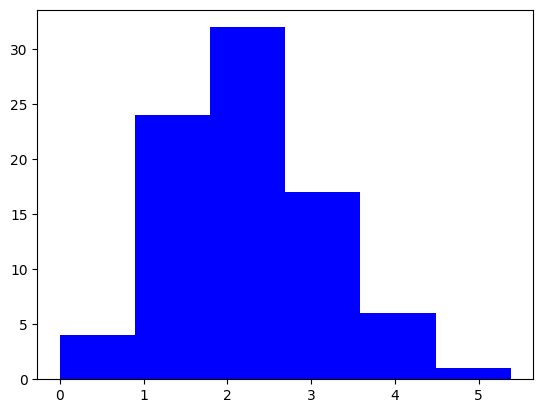

[ 4. 24. 32. 17.  6.  1.]
[0.    0.895 1.79  2.685 3.58  4.475 5.37 ]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.154426213744016
n0:  82.23638703034833
bin_size:  0.895
n0 / bin_size:  91.88423131882494
Cov:  [[4.22718244e-04 4.51271221e-03]
 [4.51271221e-03 5.99140865e+01]]
Max:  1.8680388776673191
T1/2, mks:  6.475584525161292
Err(T1/2)+, mks:  0.9550935588293079
Err(T1/2)-, mks:  -0.8003253139575399


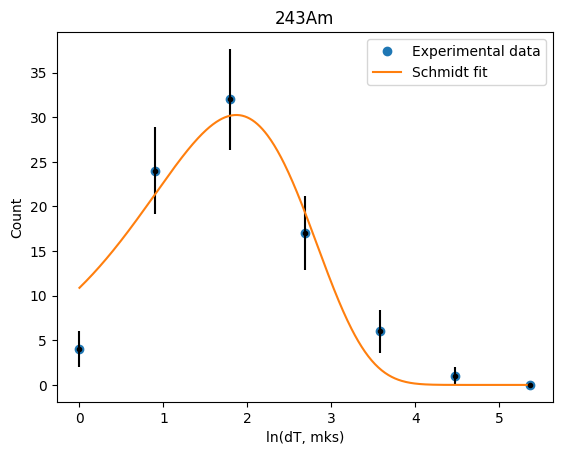


ITERATION:  894

ITERATION:  893

ITERATION:  892


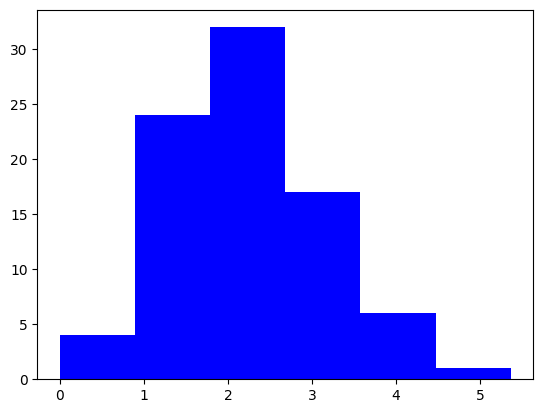

[ 4. 24. 32. 17.  6.  1.]
[0.    0.892 1.784 2.676 3.568 4.46  5.352]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.15536705342208873
n0:  82.09516266184738
bin_size:  0.892
n0 / bin_size:  92.03493571955984
Cov:  [[4.31185515e-04 4.58807387e-03]
 [4.58807387e-03 6.00756657e+01]]
Max:  1.8619648749670632
T1/2, mks:  6.436371019300214
Err(T1/2)+, mks:  0.953723026433063
Err(T1/2)-, mks:  -0.7980264607940839


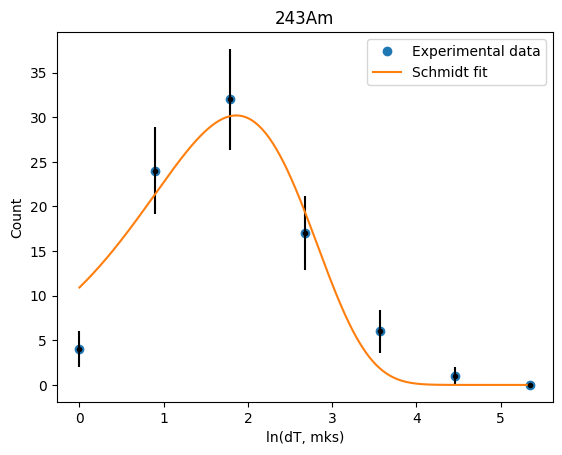


ITERATION:  891

ITERATION:  890

ITERATION:  889


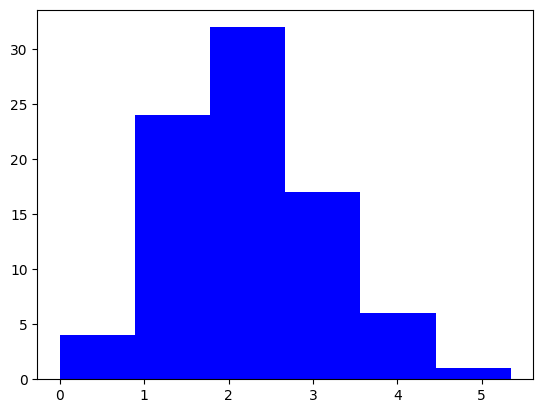

[ 4. 24. 32. 17.  6.  1.]
[0.    0.889 1.778 2.667 3.556 4.445 5.334]
[2.         4.89897949 5.65685425 4.12310563 2.44948974 1.
 0.        ]

SF count:  84.0
Lambda:  0.1563138548934913
n0:  81.95378388311046
bin_size:  0.889
n0 / bin_size:  92.1864835580545
Cov:  [[4.39862411e-04 4.66500368e-03]
 [4.66500368e-03 6.02412713e+01]]
Max:  1.855889402530661
T1/2, mks:  6.397385572004332
Err(T1/2)+, mks:  0.9523752702669857
Err(T1/2)-, mks:  -0.7957916248056058


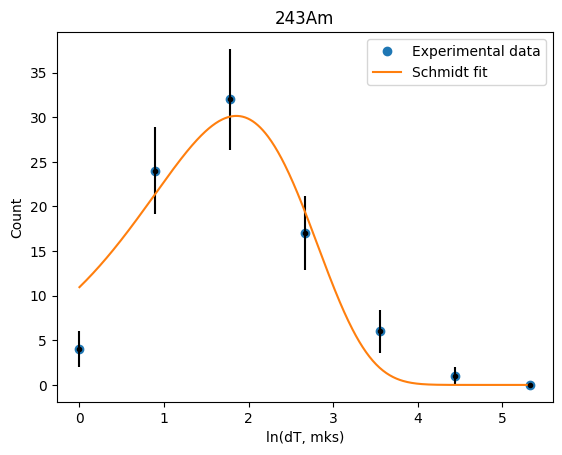


ITERATION:  888

ITERATION:  887

ITERATION:  886

ITERATION:  885

ITERATION:  884

ITERATION:  883

ITERATION:  882

ITERATION:  881

ITERATION:  880

ITERATION:  879

ITERATION:  878

ITERATION:  877

ITERATION:  876

ITERATION:  875

ITERATION:  874

ITERATION:  873

ITERATION:  872

ITERATION:  871

ITERATION:  870

ITERATION:  869

ITERATION:  868

ITERATION:  867

ITERATION:  866

ITERATION:  865

ITERATION:  864

ITERATION:  863

ITERATION:  862

ITERATION:  861

ITERATION:  860

ITERATION:  859

ITERATION:  858

ITERATION:  857

ITERATION:  856

ITERATION:  855

ITERATION:  854

ITERATION:  853

ITERATION:  852

ITERATION:  851

ITERATION:  850

ITERATION:  849

ITERATION:  848

ITERATION:  847

ITERATION:  846

ITERATION:  845

ITERATION:  844

ITERATION:  843

ITERATION:  842

ITERATION:  841

ITERATION:  840

ITERATION:  839

ITERATION:  838

ITERATION:  837

ITERATION:  836

ITERATION:  835

ITERATION:  834

ITERATION:  833

ITERATION:  832

ITERATION:  831

ITERATION:  8

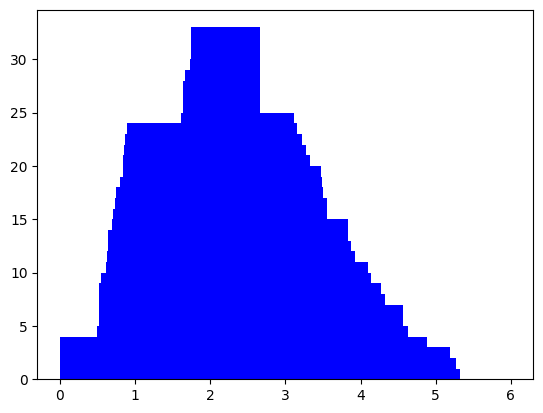

In [25]:
minErrPos = 1000000000000.0
minErrNeg = 1000000000000.0
selectedIteration = -1
for i in reversed(range(10, 990)):
    print("\nITERATION: ", i)

    bin_size = float(i)/1000.0
    counts, bins, bars = plt.hist(times_ln.astype('float'), bins=np.arange(0, 6.0, step=bin_size), color='blue')
    # plt.show()

    x = bins
    y = np.append(counts, 0)
    dy = np.array(list(map(lambda c : np.sqrt(c), y)))

    sf = np.sum(y)
    n0_approx = sf * bin_size
    lam_approx = 0.1

    def func(x, lam, n0):
        return n0*np.exp(x + np.log(lam))*np.exp(-np.exp(x + np.log(lam)))

    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    def fit_param_errors(pcov_matrix):
        return np.sqrt(np.diag(pcov_matrix))

    popt, pcov = optimize.curve_fit(func, x, y, [lam_approx, n0_approx])

    x_cont = np.arange(x.min(), x.max(), 0.01)

    err = fit_param_errors(pcov)[0]
    errPos = (1/(popt[0]-err))-hl
    errNeg = (1/(popt[0]+err))-hl

    plot_it = False
    if (errPos**2 + errNeg**2) < (minErrNeg**2 + minErrPos**2): # Check for minimal errors
        minErrPos = errPos
        minErrNeg = errNeg
        plot_it = True

    if plot_it:
        selectedIteration = i
        plt.show() # bins
        print(counts)
        print(bins)
        print(dy)

        print("\nSF count: ", sf)
        print("Lambda: ", popt[0])
        print("n0: ", popt[1])
        print("bin_size: ", bin_size)
        print("n0 / bin_size: ", popt[1]/bin_size)
        print("Cov: ", pcov)
        hl = 1/popt[0]
        print("Max: ", np.log(hl))
        print("T1/2, mks: ", hl)
        print("Err(T1/2)+, mks: ", errPos)
        print("Err(T1/2)-, mks: ", errNeg)

        # fit
        plt.plot(x, y, "o", label='Experimental data')
        plt.errorbar(x, y, yerr=dy, fmt='.k')
        plt.plot(x_cont, func(x_cont, *popt), label='Schmidt fit')
        # plt.plot(x_cont, func(x_cont, lam_approx, n0_approx), label='Schmidt distr. for known T1/2')
        plt.legend()
        plt.title(isotope_name)
        plt.xlabel('ln(dT, mks)')
        plt.ylabel('Count')
        plt.show()


print("_______________")
print("SELECTED ITERATION: ", selectedIteration)
print("minErrPos: ", minErrPos)
print("minErrNeg: ", minErrNeg)


In [2]:
# https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
from scipy.integrate import quad
integral = quad(func, 0, 20, args=(popt[0], popt[1]/bin_size))
print("Integral: ", integral)

Integral:  (238.56946296158327, 1.3721186629539472e-06)


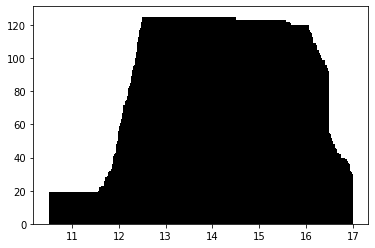

In [3]:
xx1 = []
yy1 = []
zz1 = []
for i in range(100, 2000, 1):
    b = i / 1000
    counts1, bins1, bars1 = plt.hist(times_ln.astype('float'), bins=np.arange(10.5, 17.0, step=b), color='black')
    x1 = bins1
    y1 = np.append(counts1, 0)
    popt1, pcov1 = optimize.curve_fit(func, x1, y1, [lam_approx, sf * b])
    hl1 = 1/popt1[0]
    err1 = fit_param_errors(pcov1)[0]
    xx1 = np.append(xx1, b)
    yy1 = np.append(yy1, hl1/1000000)
    zz1 = np.append(zz1, err1)

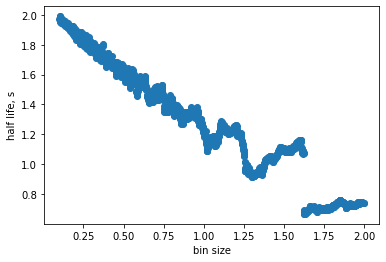

In [4]:
plt.plot(xx1, yy1, "o", label='test bins')
plt.xlabel('bin size')
plt.ylabel('half life, s')
plt.show()

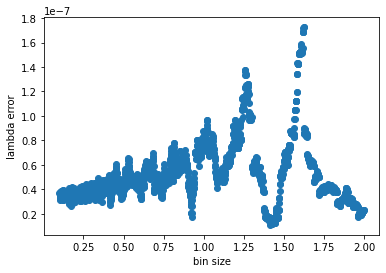

In [5]:
plt.plot(xx1, zz1, "o", label='test bins')
plt.xlabel('bin size')
plt.ylabel('lambda error')
plt.show()